In [1]:
from keras.layers import Dense, Activation, Input, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import cv2
import gc

from PIL import Image
from keras.optimizers import RMSprop, Adam, Adadelta, SGD
import csv
import numpy as np
from keras import backend as K



Using TensorFlow backend.


In [2]:
K.clear_session()

In [3]:
def compile_model_2():
    input_img = Input(shape = (16384,))
    
    d = 0
    
    encoded = Dense(4096, activation='relu')(input_img)
    #encoded = Dropout(d)(encoded)
    encoded = Dense(2048, activation='relu')(encoded)
    #encoded = Dropout(d)(encoded)
    encoded = Dense(1024, activation='relu')(encoded)
    #encoded = Dropout(d)(encoded)
    
    encoded = Dense(512, activation='relu')(encoded)
    #encoded = Dropout(d)(encoded)
 
    decoded = Dense(1024, activation='relu')(encoded)
    #decoded = Dropout(d)(decoded)

    decoded = Dense(2048, activation='relu')(encoded)
    decoded = Dropout(d)(decoded)
    decoded = Dense(4096, activation='relu')(encoded)
    decoded = Dropout(d)(decoded)
    decoded = Dense(16384, activation='relu')(decoded)
    decoded = Dropout(d)(decoded)
    decoded = Dense(2, activation='linear')(decoded)

    model = Model(input_img, decoded)
    
    opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    model.compile(optimizer = opt, loss = 'mean_absolute_error')
    
    return model

In [20]:
def compile_model_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=[128,128,1]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))
    
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))
    
 
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='linear'))
    
    opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    model.compile(optimizer = opt, loss = 'mean_absolute_error')
     
    return model

In [5]:
def compile_model():
    
    input_img = Input(shape = (16384,))
    #encoded = Dropout(0.1)(input_img)
    
    encoded = Dense(1000, activation = 'relu')(input_img)
    decoded = Dropout(0.2)(encoded)
    
    decoded = Dense(2, activation='linear')(encoded)
    
    model = Model(input_img, decoded)
    
    opt = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
    
    model.compile(optimizer = 'Adam', loss = 'mean_absolute_error')
    
    return model

In [6]:
def process_image(file_path):
    image = Image.open(file_path).convert('L')
    image = np.asarray(image)
    
    if NOISE == 1:
        noisy = np.random.poisson(image / 255.0 * PEAK) / PEAK * 255
        return noisy
    return image
    #print(np.shape(image))

In [7]:
def load_training():
    X_train = []
    Y_train = []
    dataset = pd.read_csv('randomimages/dataset.csv')
    for index, row in dataset.iterrows():
        img = process(image)
        X_train.append(img)
        y_train.append( [ row['height'] ] )
    
    with open('randomimages/dataset.csv', newline = '') as csvfile:
        dataset = csv.reader(csvfile, delimiter=',')
        count = 0
        for row in dataset:
            #if count == 0:
                #count = 1
               # continue
            img = process_image('randomimages/{}'.format(row[0]))
            X_train.append(img)
            Y_train.append(float(row[1]))
            count+=1
        #print(count)
    return(X_train, Y_train)

In [8]:
def backup():
    X_train = []
    Y_train = []
    #Z_train = []
    with open('randomimages/dataset.csv', newline = '') as csvfile:
        dataset = csv.reader(csvfile, delimiter=',')
        count = 0
        for row in dataset:
            if count == 0:
                count = 1
                continue
            img = process_image('randomimages/{}'.format(row[0]))
            X_train.append(img)
            Y_train.append([float(row[1]), float(row[2])])
            #Z_train.append(float(row[2]))
            count+=1
        #print(count)
    return(X_train, Y_train)

In [9]:
def load_test():
    X_train = []
    Y_train = []
    #Z_train = []
    with open('images/dataset.csv', newline = '') as csvfile:
        dataset = csv.reader(csvfile, delimiter=',')
        count = 0
        for row in dataset:
            if count == 0:
                count = 1
                continue
            img = process_image('images/{}'.format(row[0]))
            X_train.append(img)
            Y_train.append([float(row[1]), float(row[2])])
            #Z_train.append(float(row[2]))
            count+=1
        #print(count)
    return(X_train, Y_train)

In [10]:
def scale_vals(x_train):
    
    x_train

In [11]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [12]:
def normalise(mode, test):
    
    if test == 0:
        train_data, train_target = backup()
    else:
        train_data, train_target = load_test()
    #print(train_data)
    #print(train_target)
    train_data = np.array(train_data, dtype=np.float32)
    train_target = np.array(train_target, dtype=np.float32)
    if mode != 3:
        train_data = train_data.reshape((len(train_data), np.prod(train_data.shape[1:])))
    
    print(np.shape(train_data))
    print(np.shape(train_target))
    m = train_data.mean()
    s = train_data.std()

    #print ('Train mean, sd:', m, s )
    #train_data -= m
    train_data -= m
    train_data /= s
    print('Train shape:', train_data.shape)
    print(train_data.shape[0], 'train samples')
    print(np.mean(train_target, axis=0))
    print(np.median(train_target, axis=0))
    print(np.max(train_target, axis=0), np.min(train_target, axis=0))
    print(np.std(train_target, axis=0))
    return train_data, train_target

In [13]:
def train_model(batch_size = 32, nb_epoch = 500, mode = 1):
    
    e_s = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto')
    
    n_samples = 1373
    cv_size = 200
    train_data, train_target = normalise(mode, 0)
    
    if mode == 3:
        train_data = train_data.reshape((-1, 128, 128, 1))
    X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=cv_size)
    print(np.shape(X_train))
    
    if mode == 1:
        model = compile_model()
    
    elif mode == 2:
        model = compile_model_2()
    else:
        model = compile_model_3()
    history = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_valid, y_valid), callbacks=[e_s])
    
    predictions_valid = model.predict(X_valid, batch_size=10, verbose=1)
    #compare = pd.DataFrame(data={'original':y_valid.reshape((cv_size,)),
             #'prediction':predictions_valid.reshape((cv_size,))})
    #compare.to_csv('compare.csv')

    return history, model

In [14]:
def prepare_test(model, mode):
    train_data, train_target = normalise(mode, 1)
    print(np.mean(train_target, axis=0))
    if mode == 3:
        train_data = train_data.reshape((-1, 128, 128, 1))
    score = model.evaluate(train_data, train_target, verbose=1)
    prediction = model.predict(train_data, verbose=1)
    return score, prediction, train_target

In [15]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [16]:
NOISE = 0
PEAK = 50

In [21]:
history, model = train_model(nb_epoch = 100, mode = 3)

(1373, 128, 128)
(1373, 2)
Train shape: (1373, 128, 128)
1373 train samples
[0.12542838 0.21359918]
[0.29184896 0.4044712 ]
[8.987202 8.997651] [-8.983497 -8.999926]
[5.2913055 5.1755347]
(1173, 128, 128, 1)


c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1173 samples, validate on 200 samples
Epoch 1/100
1173/1173 [==============================] - 6s 5ms/step - loss: 4.2646 - val_loss: 3.6564
Epoch 2/100
1173/1173 [==============================] - 3s 2ms/step - loss: 2.0093 - val_loss: 0.9363
Epoch 3/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.5460 - val_loss: 0.2733
Epoch 4/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.2942 - val_loss: 0.2683
Epoch 5/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.2593 - val_loss: 0.1994
Epoch 6/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.2241 - val_loss: 0.2031
Epoch 7/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.2151 - val_loss: 0.1526
Epoch 8/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.1995 - val_loss: 0.2163
Epoch 9/100
1173/1173 [==============================] - 3s 2ms/step - loss: 0.2038 - val_loss: 0.1661
Epoch 10/100
1173/1173 [==

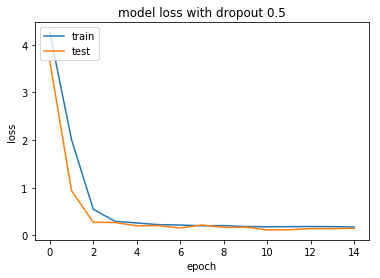

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with dropout 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("dropout_2.png")
plt.show()

In [23]:
score, prediction, train_data = prepare_test(model, 3)
print(score)

(485, 128, 128)
(485, 2)
Train shape: (485, 128, 128)
485 train samples
[-0.02813059 -0.00114116]
[-0.06013567 -0.04936417]
[9. 9.] [-9. -9.]
[5.4145575 5.4357114]
[-0.02813059 -0.00114116]
485/485 [==============================] - 0s 373us/step
0.13482873710160403


In [24]:
total_scores = []
total_avg = []

In [23]:
del model

NameError: name 'model' is not defined

In [17]:
results = []
raw_results = []

In [18]:
def limit_mem():
    K.get_session().close()
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))

In [19]:


for i in range(5):
    
    if 'session' in locals() and session is not None:
        print('Close interactive session')
        session.close()
    history, model = train_model(nb_epoch = 100, mode = 2)
    score, prediction, train_target = prepare_test(model, 2)
    
    print(mean_absolute_error(train_target, prediction))
    print(mean_absolute_error(train_target, prediction, multioutput='raw_values'))
    
    raw_results.append(mean_absolute_error(train_target, prediction, multioutput='raw_values'))
    
    #print(score)
    results.append(score)
    print(results)
    K.clear_session()
    del model
    
print(results)
print(prediction)

(1373, 16384)
(1373, 2)
Train shape: (1373, 16384)
1373 train samples
[0.12542838 0.21359918]
[0.29184896 0.4044712 ]
[8.987202 8.997651] [-8.983497 -8.999926]
[5.2913055 5.1755347]
(1173, 16384)


c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1173 samples, validate on 200 samples
Epoch 1/100
1173/1173 [==============================] - 11s 9ms/step - loss: 2.0737 - val_loss: 0.5872
Epoch 2/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.3548 - val_loss: 0.2374
Epoch 3/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.2248 - val_loss: 0.2041
Epoch 4/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1997 - val_loss: 0.1850
Epoch 5/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1726 - val_loss: 0.1789
Epoch 6/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1632 - val_loss: 0.1894
Epoch 7/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1646 - val_loss: 0.1915
Epoch 8/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1890 - val_loss: 0.2445
Epoch 9/100
200/200 [==============================] - 0s 486us/step
(485, 16384)
(485, 2)
Train shape: (485, 16384)
485 train s

c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1173 samples, validate on 200 samples
Epoch 1/100
1173/1173 [==============================] - 9s 8ms/step - loss: 2.0328 - val_loss: 0.4088
Epoch 2/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.3552 - val_loss: 0.2443
Epoch 3/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.2268 - val_loss: 0.2022
Epoch 4/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.2013 - val_loss: 0.1982
Epoch 5/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1985 - val_loss: 0.1769
Epoch 6/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1643 - val_loss: 0.1688
Epoch 7/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1597 - val_loss: 0.1695
Epoch 8/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1532 - val_loss: 0.1705
Epoch 9/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1630 - val_loss: 0.1654
Epoch 10/100
1173/1173 [==

c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1173 samples, validate on 200 samples
Epoch 1/100
1173/1173 [==============================] - 9s 8ms/step - loss: 1.9180 - val_loss: 0.3159
Epoch 2/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.2796 - val_loss: 0.2228
Epoch 3/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.2251 - val_loss: 0.2309
Epoch 4/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.2011 - val_loss: 0.2625
Epoch 5/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1799 - val_loss: 0.2531
Epoch 6/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1692 - val_loss: 0.2132
Epoch 7/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1546 - val_loss: 0.1836
Epoch 8/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1506 - val_loss: 0.1811
Epoch 9/100
1173/1173 [==============================] - 4s 4ms/step - loss: 0.1447 - val_loss: 0.1705
Epoch 10/100
1173/1173 [==

c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1173 samples, validate on 200 samples
Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[4096,16384] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/Variable_10/Assign = Assign[T=DT_FLOAT, _grappler_relax_allocator_constraints=true, use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/Variable_10, training/Adam/zeros_10)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'training/Adam/Variable_10/Assign', defined at:
  File "c:\users\micha\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tornado\platform\asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-21454e3f7402>", line 8, in <module>
    history, model = train_model(nb_epoch = 100, mode = 2)
  File "<ipython-input-13-523b156b0344>", line 24, in train_model
    history = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_valid, y_valid), callbacks=[e_s])
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py", line 1008, in fit
    self._make_train_function()
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py", line 498, in _make_train_function
    loss=self.total_loss)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py", line 482, in get_updates
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py", line 482, in <listcomp>
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py", line 702, in zeros
    return variable(v, dtype=dtype, name=name)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py", line 400, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\variables.py", line 259, in __init__
    constraint=constraint)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\variables.py", line 412, in _init_from_args
    validate_shape=validate_shape).op
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\state_ops.py", line 219, in assign
    validate_shape=validate_shape)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 63, in assign
    use_locking=use_locking, name=name)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "c:\users\micha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[4096,16384] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training/Adam/Variable_10/Assign = Assign[T=DT_FLOAT, _grappler_relax_allocator_constraints=true, use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/Variable_10, training/Adam/zeros_10)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [20]:
print(np.average(results))
print(np.average(raw_results, axis=0))

0.20728548232632404
[0.19906528 0.21550561]


In [33]:

total_scores.append(results)
total_scores.append(np.average(results))

NameError: name 'total_scores' is not defined

In [20]:
print(np.average([0.24764365, 0.17424849, 0.22230779, 0.19859296, 0.21763971]))
print(np.average([[0.27137363, 0.22391368], [0.24764362549044422, 0.17424856080222376], [0.24183622, 0.20277935], [0.25295576, 0.2055275 ], [0.20142184, 0.19576408], [0.25084203, 0.1844374 ]], axis=0))

0.21208652
[0.24434552 0.19777843]
